# Importing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

import mlflow
from mlflow.tracking import MlflowClient 
import mlflow.sklearn

In [2]:
INPUT_DATA = '../data/interim/03_data_features.pkl'

EXPERIMENT_NAME = 'Fitness_tracker_2'
N_PCA_COM = 10
RANDOM_STATE = 42 

# load the Data

In [3]:
df = pd.read_pickle(INPUT_DATA)

In [4]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,5
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,0
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,3
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,3


In [5]:
X = df.drop(['participant',
       'label', 'category', 'set'] , axis = 1)

y = df['label']

In [6]:
X

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,-0.311963,-0.167364,-0.013911,0.940455,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,5
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,-0.279209,-0.079385,0.045996,0.862867,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,-0.328399,-0.066606,0.032153,0.999635,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,-0.318289,-0.066734,0.040494,0.973592,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,-0.298084,-0.079820,0.046036,0.914173,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,0.349738,-0.028197,-0.069053,0.960312,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,0
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,0.419648,-0.179453,-0.048139,1.198556,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,3
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,0.349351,-0.148450,-0.053031,0.991076,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,3


In [7]:
y.value_counts()

squat    701
bench    699
ohp      698
dead     689
row      568
rest     513
Name: label, dtype: int64

# Feature selection

In [15]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE



# Create a base classifier
estimator = DecisionTreeClassifier()

# Create RFE model
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit RFE
selector = selector.fit(X, y)

# Selected features
selected_features = selector.support_

# Print selected features
print("Selected Features:", selected_features)


Selected Features: [False False False False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False False  True False  True False False False
 False False False False False  True False  True False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False  True
  True False False False False False False False]


In [81]:
feature_Set =  list(selector.get_feature_names_out())
feature_Set

['acc_y_temp_std_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.714_Hz_ws_14',
 'acc_z_freq_0.0_Hz_ws_14',
 'gyr_z_freq_0.714_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.357_Hz_ws_14']

In [82]:
feature_Set= ['acc_y_temp_std_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.714_Hz_ws_14',
 'acc_z_freq_0.0_Hz_ws_14',
 'gyr_z_freq_0.714_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.357_Hz_ws_14']

In [25]:
X = X[feature_Set]

# Dimensionality redaction

In [42]:
pca_model = PCA(n_components=6)
pca_X = pca_model.fit_transform(X)

In [44]:
pca_model.explained_variance_ratio_.sum()

0.9998430211892776

We see here the 10 components give us 99% form data variance

# split the data 

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=0.25, random_state=42 , stratify=y)

In [46]:
len(X_test)

967

In [47]:
y_train.value_counts()

squat    526
bench    524
ohp      523
dead     517
row      426
rest     385
Name: label, dtype: int64

In [48]:
y_test.value_counts()

bench    175
ohp      175
squat    175
dead     172
row      142
rest     128
Name: label, dtype: int64

# Modeling

---


## Initialize MLflow Tracking

In [44]:
# Start a new MLflow run
# mlflow.create_experiment(EXPERIMENT_NAME)
# mlflow.set_experiment_tag('version' , '1.0')
 

In [12]:
mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='file:///c:/Users/xobed/OneDrive/Desktop/Data_science_And_ML_projects/Fitness-tracker-based-on-ML-2/notebooks/mlruns/782367355150423915', creation_time=1711144119798, experiment_id='782367355150423915', last_update_time=1711144119798, lifecycle_stage='active', name='Fitness_tracker_2', tags={}>

In [13]:
client =  MlflowClient()
exp =  client.get_experiment_by_name(EXPERIMENT_NAME)

### 0)Baseline model 

In [53]:

# Define model parameters
model_name = "KNeighborsClassifier"
num_neighbors = 5  # Specify the number of neighbors

pca_model = PCA(n_components=N_PCA_COM , random_state= RANDOM_STATE)
base_model =  KNeighborsClassifier(n_neighbors = num_neighbors)
# base_model.fit(X_train , y_train)

base_model_pipeline =  make_pipeline(pca_model , base_model )

# Perform k-fold cross-validation
k_fold = 5  # Specify the number of folds
scores = cross_val_score(base_model_pipeline, X_train, y_train, cv=k_fold)

Because the data set is small and we can't make validation set, we will perform Cross-validation

In [54]:
acc = scores.mean()
print("Cross-validation scores:", acc)

Cross-validation scores: 0.8659154845984924


In [55]:
with mlflow.start_run(experiment_id= exp.experiment_id):
    # Log model parameters
    mlflow.log_param("model_name", model_name)
    mlflow.log_param("num_neighbors", num_neighbors)
    
    mlflow.log_param("NUM_pac", N_PCA_COM)
    mlflow.log_param("random_state", RANDOM_STATE)
    
    
    # Log the mean accuracy metric using MLflow
    mlflow.log_metric("mean_accuracy", acc)

    

NameError: name 'exp' is not defined

In [57]:
mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mean_accuracy,params.model_name,params.random_state,params.num_neighbors,params.NUM_pac,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type
0,beba5b2328734f8d9b08d218056921bc,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:03:12.262000+00:00,2024-03-22 22:03:12.464000+00:00,0.871771,KNeighborsClassifier,42,5,10,suave-snipe-697,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL


## 1)choose model


In [56]:
def cross_val_evaluate(X_train, y_train , k_fold = 5):
    models = {
        'KNeighbors': KNeighborsClassifier(),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'SVM': SVC()
    }
    
    pca_model = PCA(n_components=N_PCA_COM , random_state= RANDOM_STATE)
    

    results = {}

    for model_name, model in models.items():
        # print(model_name , model )
        base_model_pipeline =  make_pipeline(pca_model , model )
        
        scores = cross_val_score(base_model_pipeline, X_train, y_train, cv=k_fold)
        
        acc = scores.mean()

        results[model_name] = {
            'accuracy': acc
        }
        
        # with mlflow.start_run(experiment_id= exp.experiment_id):
        #     # Log model parameters
        #     mlflow.log_param("model_name", model_name)
            
        #     mlflow.log_param("NUM_pac", N_PCA_COM)
        #     mlflow.log_param("random_state", RANDOM_STATE)
            
            
        #     # Log the mean accuracy metric using MLflow
        #     mlflow.log_metric("mean_accuracy", acc)
       

        print(results)

    return results

In [57]:
results = cross_val_evaluate(X_train , y_train )

{'KNeighbors': {'accuracy': 0.8659154845984924}}
{'KNeighbors': {'accuracy': 0.8659154845984924}, 'DecisionTree': {'accuracy': 0.970700931806042}}
{'KNeighbors': {'accuracy': 0.8659154845984924}, 'DecisionTree': {'accuracy': 0.970700931806042}, 'RandomForest': {'accuracy': 0.9851807228915662}}
{'KNeighbors': {'accuracy': 0.8659154845984924}, 'DecisionTree': {'accuracy': 0.970700931806042}, 'RandomForest': {'accuracy': 0.9851807228915662}, 'AdaBoost': {'accuracy': 0.2595892931331236}}
{'KNeighbors': {'accuracy': 0.8659154845984924}, 'DecisionTree': {'accuracy': 0.970700931806042}, 'RandomForest': {'accuracy': 0.9851807228915662}, 'AdaBoost': {'accuracy': 0.2595892931331236}, 'GradientBoosting': {'accuracy': 0.9872449403525432}}
{'KNeighbors': {'accuracy': 0.8659154845984924}, 'DecisionTree': {'accuracy': 0.970700931806042}, 'RandomForest': {'accuracy': 0.9851807228915662}, 'AdaBoost': {'accuracy': 0.2595892931331236}, 'GradientBoosting': {'accuracy': 0.9872449403525432}, 'SVM': {'accura

In [68]:
results = {'KNeighbors': {'accuracy': 0.871771024986646},
 'DecisionTree': {'accuracy': 0.831789423704671},
 'RandomForest': {'accuracy': 0.8959083625140959},
 'AdaBoost': {'accuracy': 0.5211804854887531},
 'GradientBoosting': {'accuracy': 0.8838494866164165},
 'SVM': {'accuracy': 0.38627989791679035}}

pd.DataFrame(results).T

,accuracy
KNeighbors,0.871771
DecisionTree,0.831789
RandomForest,0.895908
AdaBoost,0.521180
GradientBoosting,0.883849
SVM,0.386280


In [69]:
mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mean_accuracy,params.model_name,params.random_state,params.NUM_pac,params.num_neighbors,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type
0,e73fe78cedcc45b39410fcb47cb33e04,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:24:44.122000+00:00,2024-03-22 22:24:44.255000+00:00,0.386280,SVM,42,10,None,adventurous-skink-85,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL
1,aabdb1ae6d004e9c8bb98ba870240836,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:24:40.189000+00:00,2024-03-22 22:24:40.305000+00:00,0.884539,GradientBoosting,42,10,None,blushing-bird-13,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL
2,ebee2ad28753437c935ef93568c679fa,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:36.153000+00:00,2024-03-22 22:23:36.290000+00:00,0.521180,AdaBoost,42,10,None,wise-ox-297,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL
3,d276fbae3d984e538edb4388f453e19b,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:31.792000+00:00,2024-03-22 22:23:31.930000+00:00,0.897979,RandomForest,42,10,None,treasured-grub-21,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL
4,1a1035551c834e1b9db21d914f7b1a7a,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:19.111000+00:00,2024-03-22 22:23:19.232000+00:00,0.829034,DecisionTree,42,10,None,sassy-fawn-470,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL
5,b1602179822a463cbad553fc4ab4fc08,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:18.366000+00:00,2024-03-22 22:23:18.491000+00:00,0.871771,KNeighbors,42,10,None,languid-doe-557,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL
6,beba5b2328734f8d9b08d218056921bc,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:03:12.262000+00:00,2024-03-22 22:03:12.464000+00:00,0.871771,KNeighborsClassifier,42,10,5,suave-snipe-697,xobed,C:\Users\xobed\AppData\Roaming\Python\Python31...,LOCAL


## Try ANN 

In [94]:
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

In [118]:
y

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:08.400    bench
2019-01-11 15:08:08.800    bench
2019-01-11 15:08:09.200    bench
2019-01-11 15:08:09.600    bench
                           ...  
2019-01-20 17:33:26.200      row
2019-01-20 17:33:26.600      row
2019-01-20 17:33:27.000      row
2019-01-20 17:33:27.400      row
2019-01-20 17:33:27.800      row
Name: label, Length: 3868, dtype: object

In [102]:
X_train.shape

(2901, 116)

In [128]:
# Define the model
Ann = Sequential()

# Add the input layer and first hidden layer
Ann.add(Dense(units=10, activation='relu', input_dim=10))

# Add the output layer
Ann.add(Dense(units=6, activation='softmax'))

# Compile the model
Ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
Ann.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 6)                 66        
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert integer labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_encoded, num_classes=6)


NameError: name 'y_train' is not defined

In [ ]:
y_train_one_hot

In [131]:
pca_model = PCA(n_components=N_PCA_COM , random_state= RANDOM_STATE)
pca_X_train =  pca_model.fit_transform(X_train)

In [132]:
pca_X_train.shape

(2901, 10)

In [134]:
Ann.fit(pca_X_train, y_train_one_hot, batch_size=32, epochs=200)

Epoch 1/200
91/91 [==============================] - 0s 1ms/step - loss: 1.5247 - accuracy: 0.7239
Epoch 2/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8962 - accuracy: 0.7266
Epoch 3/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8629 - accuracy: 0.7356
Epoch 4/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8569 - accuracy: 0.7349
Epoch 5/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8458 - accuracy: 0.7284
Epoch 6/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8373 - accuracy: 0.7322
Epoch 7/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8197 - accuracy: 0.7425
Epoch 8/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8242 - accuracy: 0.7387
Epoch 9/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8121 - accuracy: 0.7497
Epoch 10/200
91/91 [==============================] - 0s 1ms/step - loss: 0.8165 - accuracy: 0.7418
Epoch 11/

### OK, i choose Random forest as the main model

## 2)Train the model


In [58]:
pca_model = PCA( random_state= RANDOM_STATE)
random_forest = RandomForestClassifier(n_jobs = 6)

pipe_model = Pipeline(
    [
        ('pca_model', pca_model),
        ('random_f', random_forest)
    ]
)

scores = cross_val_score(pipe_model, X_train, y_train, cv=5)
        

### 3)Evaluate the model


In [59]:
acc = scores.mean()
acc

0.9851795358775

### 4)hyperparameter tuning


In [60]:
param_grid = {
    'pca_model__n_components' : [2, 4, 6,8,10] ,
    'random_f__n_estimators': [60,80 , 100 , 120],
    'random_f__max_depth': [8, 10, None],
    'random_f__bootstrap': [True, False],
}


In [61]:
# Create the GridSearchCV model
grid_search = GridSearchCV(pipe_model, param_grid,
                           cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=60; total time=   0.1s
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=60; total time=   0.1s
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=60; total time=   0.1s
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=80; total time=   0.5s
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=80; total time=   0.1s
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=80; total time=   0.2s
[CV] END pca_model__n_components=2, random_f__bootstrap=True, random_f__max_depth=8, random_f__n_estimators=100; total time=   0.2s
[CV] END pca_model_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca_model', PCA(random_state=42)),
                                       ('random_f',
                                        RandomForestClassifier(n_jobs=6))]),
             param_grid={'pca_model__n_components': [2, 4, 6, 8, 10],
                         'random_f__bootstrap': [True, False],
                         'random_f__max_depth': [8, 10, None],
                         'random_f__n_estimators': [60, 80, 100, 120]},
             scoring='accuracy', verbose=2)

In [62]:
grid_search.best_score_

0.9865563598759048

In [63]:
grid_search.best_params_

{'pca_model__n_components': 10,
 'random_f__bootstrap': False,
 'random_f__max_depth': None,
 'random_f__n_estimators': 80}

### 5) final evaluation


In [71]:
# pca_model = PCA( n_components= 50, random_state= RANDOM_STATE)
random_forest = RandomForestClassifier(n_jobs = 6 , n_estimators= 80 , bootstrap=False , max_depth=9)

# pipe_model = Pipeline(
#     [
#         ('pca_model', pca_model),
#         ('random_f', random_forest)
#     ]
# )

random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, n_estimators=80, n_jobs=6)

In [72]:
pred_train = random_forest.predict(X_train)

pred_test = random_forest.predict(X_test)

acc_train = accuracy_score(y_train , pred_train)
acc_test = accuracy_score(y_test , pred_test)

print(f'accuracy trin = {acc_train} , \naccuracy test = {acc_test}')


accuracy trin = 1.0 , 
accuracy test = 0.9937952430196484


In [73]:
print(classification_report(y_test , pred_test))

              precision    recall  f1-score   support

       bench       0.99      0.99      0.99       175
        dead       0.99      0.99      0.99       172
         ohp       0.99      0.99      0.99       175
        rest       1.00      1.00      1.00       128
         row       0.99      0.99      0.99       142
       squat       1.00      1.00      1.00       175

    accuracy                           0.99       967
   macro avg       0.99      0.99      0.99       967
weighted avg       0.99      0.99      0.99       967



In [75]:
random_forest.classes_

array(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype=object)

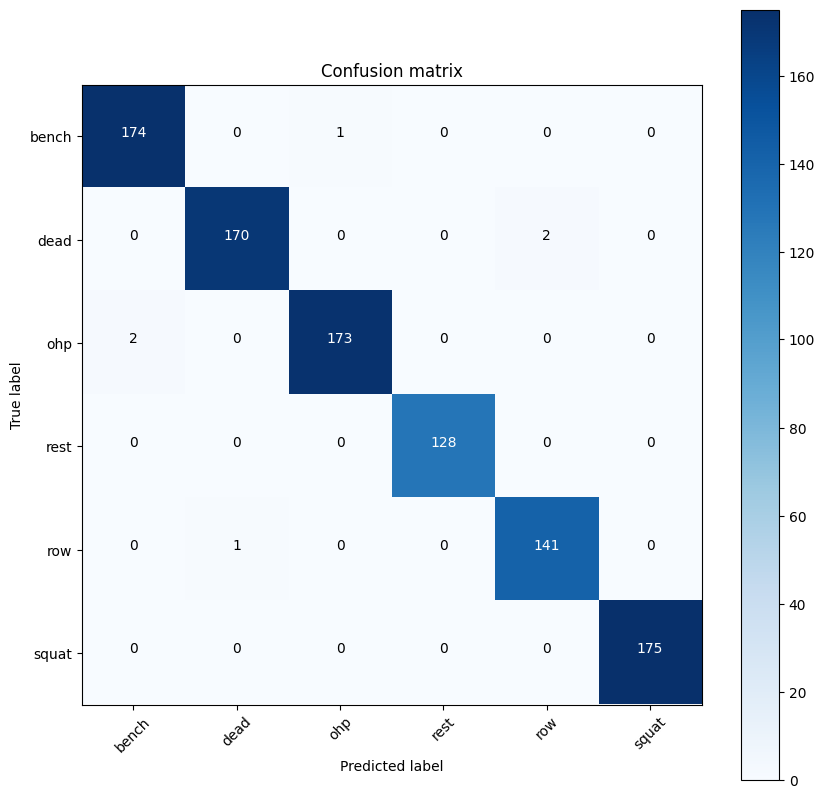

In [77]:
import itertools

classes =  random_forest.classes_

cm = confusion_matrix(y_test ,pred_test ,labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

## 6)Interpretation of model parameters


The accuracy results on both the training and test sets look quite good, indicating that your model is performing well. Additionally, the classification report provides detailed metrics for each class.

Here's a breakdown of our results:

- Training accuracy: 99.76%
- Test accuracy: 98.76%

And the classification report provides precision, recall, and F1-score for each class, as well as the macro and weighted averages.

From the classification report:

- The model performs well across all classes, with high precision, recall, and F1-score values, indicating good overall performance.
- The macro and weighted averages also show high scores, further confirming the model's strong performance.

Overall, your model seems to be accurately classifying the data, with very high precision and recall values across different classes.

### 7) final model


In [79]:
# pca_model = PCA( n_components= 50, random_state= RANDOM_STATE)
random_forest = RandomForestClassifier(n_jobs = 6 , n_estimators= 80 , bootstrap=False , max_depth=9)

# pipe_model = Pipeline(
#     [
#         ('pca_model', pca_model),
#         ('random_f', random_forest)
#     ]
# )

random_forest.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=9, n_estimators=80, n_jobs=6)

In [83]:
import joblib 

joblib.dump(random_forest , '../models/final_model.pkl')

['../models/final_model.pkl']

In [81]:
with mlflow.start_run(experiment_id= exp.experiment_id):
    # Log model parameters
    mlflow.log_param("model_name", 'final_model(RF)')
    mlflow.log_param("n_estimators", 100)
    
    mlflow.log_param("NUM_pac", 50)
    mlflow.log_param("random_state", RANDOM_STATE)
    
    
    # Log the mean accuracy metric using MLflow
    mlflow.log_metric("test_accuracy", acc_test)
    
    mlflow.log_metric("train_accuracy", acc_train)

    mlflow.log_artifact('../models/final_model.pkl')

In [82]:
mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.test_accuracy,metrics.train_accuracy,metrics.mean_accuracy,params.model_name,params.NUM_pac,params.random_state,params.n_estimators,params.num_neighbors,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name
0,a44f4f561a46457bb9448aae95dd8d30,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-23 01:04:15.327000+00:00,2024-03-23 01:04:15.463000+00:00,0.98759,0.997587,NaN,final_model(RF),50,42,100,None,handsome-fowl-606,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
1,cfcdaef77f8d4cc5909bc745c705aa42,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-23 01:02:58.977000+00:00,2024-03-23 01:02:59.058000+00:00,0.98759,0.997587,NaN,final_model(RF),50,42,100,None,gentle-swan-899,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
2,e73fe78cedcc45b39410fcb47cb33e04,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:24:44.122000+00:00,2024-03-22 22:24:44.255000+00:00,NaN,NaN,0.386280,SVM,10,42,None,None,adventurous-skink-85,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
3,aabdb1ae6d004e9c8bb98ba870240836,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:24:40.189000+00:00,2024-03-22 22:24:40.305000+00:00,NaN,NaN,0.884539,GradientBoosting,10,42,None,None,blushing-bird-13,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
4,ebee2ad28753437c935ef93568c679fa,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:36.153000+00:00,2024-03-22 22:23:36.290000+00:00,NaN,NaN,0.521180,AdaBoost,10,42,None,None,wise-ox-297,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
5,d276fbae3d984e538edb4388f453e19b,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:31.792000+00:00,2024-03-22 22:23:31.930000+00:00,NaN,NaN,0.897979,RandomForest,10,42,None,None,treasured-grub-21,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
6,1a1035551c834e1b9db21d914f7b1a7a,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:19.111000+00:00,2024-03-22 22:23:19.232000+00:00,NaN,NaN,0.829034,DecisionTree,10,42,None,None,sassy-fawn-470,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
7,b1602179822a463cbad553fc4ab4fc08,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:23:18.366000+00:00,2024-03-22 22:23:18.491000+00:00,NaN,NaN,0.871771,KNeighbors,10,42,None,None,languid-doe-557,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...
8,beba5b2328734f8d9b08d218056921bc,782367355150423915,FINISHED,file:///c:/Users/xobed/OneDrive/Desktop/Data_s...,2024-03-22 22:03:12.262000+00:00,2024-03-22 22:03:12.464000+00:00,NaN,NaN,0.871771,KNeighborsClassifier,10,42,None,5,suave-snipe-697,xobed,LOCAL,C:\Users\xobed\AppData\Roaming\Python\Python31...


# Model deployment

---


In [26]:
pd.Series().mode()

C:\Users\xobed\AppData\Local\Temp\ipykernel_24296\1874718581.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series().mode()


Series([], dtype: float64)